In [1]:
import pandas as  pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy.io import loadmat

In [5]:
import sklearn.svm as svm

In [6]:
path="F:\机器学习\吴恩达作业\machine-learning-ex6\ex6\ex6data1.mat"

In [7]:
data1=loadmat(path)

In [8]:
X1=data1["X"][:,1]
Y1=data1["X"][:,0]
label=data1["y"]

In [9]:
(Y1.min(),Y1.max())

(0.086405, 4.015)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


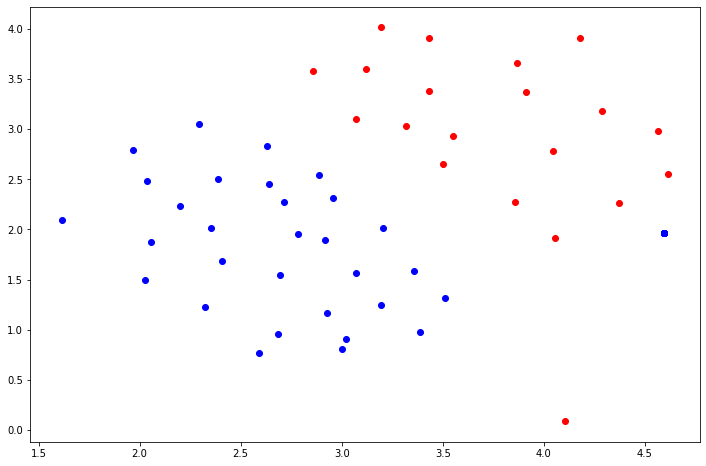

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X1[[np.where(label==1)]],Y1[[np.where(label==1)]],c="r")
ax.scatter(X1[[np.where(label==0)]],Y1[[np.where(label==0)]],c="b")
plt.show()

In [11]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [91]:
svc.fit(list(zip(X1,Y1)),label)
print(svc.score(list(zip(X1,Y1)),label))

0.9803921568627451


F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [86]:
#####要画出连续的线来验证边界：
#####函数参数的结构不要乱搞
#####正确绘图
#####放在dataframe里面好处理
#####dataframe是个好东西
def Predict_boundary(X1,Y1,confidence,C):
    svc= svm.LinearSVC(C=C, loss='hinge', max_iter=1000)
    svc.fit(list(zip(X1,Y1)),label)
    X=np.linspace(X1.min(),X1.max(),1000)
    y=np.linspace(Y1.min(),Y1.max(),1000)
    target=[(a,b) for a in X for b in y]
    a,b=zip(*target)
    data=pd.DataFrame({"X":a,"y":b})
    data["score"]=abs(svc.decision_function(data[["X","y"]]))
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(X1[[np.where(label==1)]],Y1[[np.where(label==1)]],c="r")
    ax.scatter(X1[[np.where(label==0)]],Y1[[np.where(label==0)]],c="b")
    ax.plot(data[data["score"]<confidence]["X"],data[data["score"]<confidence]["y"])
    plt.show()

F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

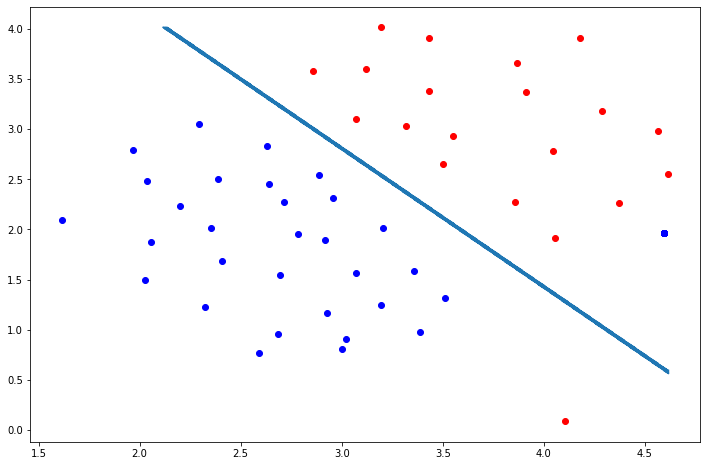

F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

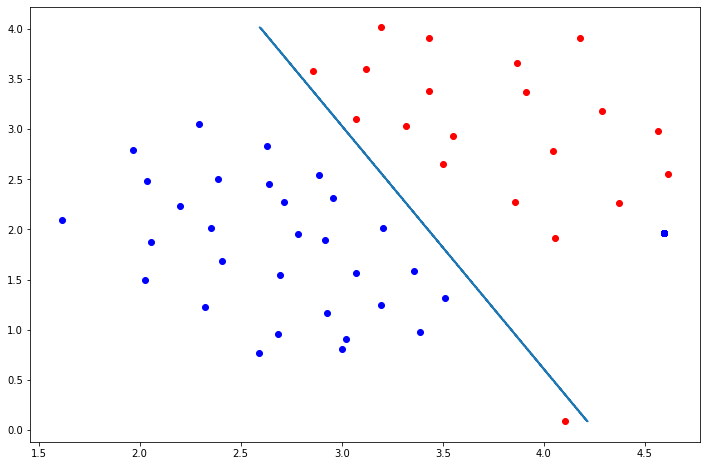

In [87]:
Predict_boundary(X1,Y1,0.01,1)
Predict_boundary(X1,Y1,0.01,1000)

In [15]:
###C值是正则项的倒数
###C值变大后对特殊点敏感了
###模型执著于寻找使得经验损失函数最小的函数

In [16]:
def gauss_kernel(x1,x2,sigma):
    sum_square=-np.sum(((x1-x2).T).dot((x1-x2)))/(2*(sigma**2))
    return np.exp(sum_square)

In [17]:
#######验证正确与否

In [18]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2
gauss_kernel(x1, x2, sigma)

0.32465246735834974

In [19]:
path="F:\机器学习\吴恩达作业\machine-learning-ex6\ex6\ex6data2.mat"

In [33]:
data2=loadmat(path)

In [34]:
X2=data2["X"][:,1]
Y2=data2["X"][:,0]
label2=data2["y"]

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


[]

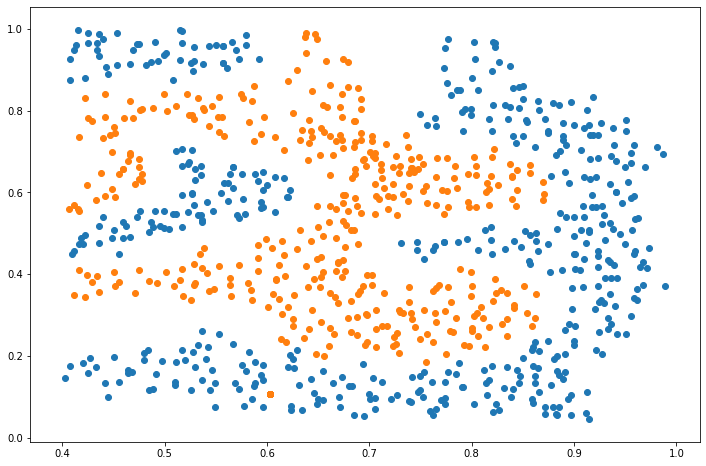

In [69]:
fig,ax=plt.subplots(figsize=((12,8)))
ax.scatter(X2[[np.where(label2==1)]],Y2[[np.where(label2==1)]])
ax.scatter(X2[[np.where(label2==0)]],Y2[[np.where(label2==0)]])
plt.plot()

In [92]:
def Predict_boundary(X2,Y2,confidence,C,label2):
    svc=svm.SVC(C=C, gamma=10, probability=True)
    svc.fit(list(zip(X2,Y2)),label2)
    print(svc.score(list(zip(X2,Y2)),label2))
    X=np.linspace(X2.min(),X1.max(),1000)
    y=np.linspace(Y2.min(),Y1.max(),1000)
    target=[(a,b) for a in X for b in y]
    a,b=zip(*target)
    data=pd.DataFrame({"X":a,"y":b})
    data["score"]=abs(svc.decision_function(data[["X","y"]]))
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(X2[[np.where(label2==1)]],Y2[[np.where(label2==1)]],c="r")
    ax.scatter(X2[[np.where(label2==0)]],Y2[[np.where(label2==0)]],c="b")
    ax.scatter(data[data["score"]<confidence]["X"],data[data["score"]<confidence]["y"])
    plt.show()

F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9466975666280417


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


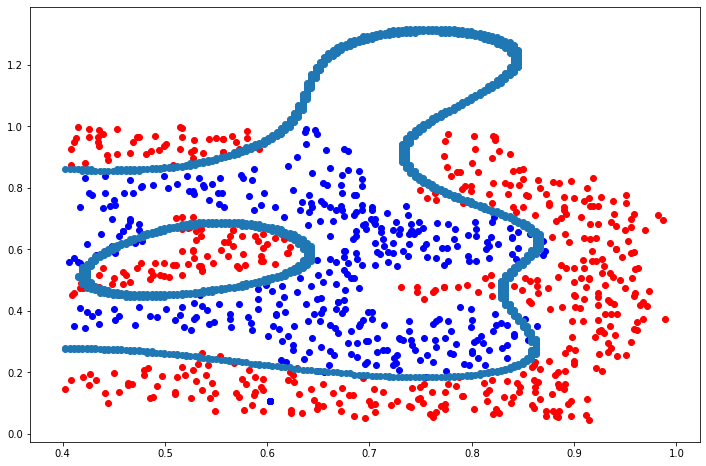

In [97]:
Predict_boundary(X2,Y2,confidence=0.1,C=10,label2=label2)